In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

print(os.listdir("../input"))



['heart.csv']


In [7]:
df = pd.read_csv("../input/heart.csv")
df.head()                               

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.isnull().sum() #We are checking data and its showing us to NaN values on data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.columns       #Now we are checking data's columns they are okay for me it's not necessary to change the columns name

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

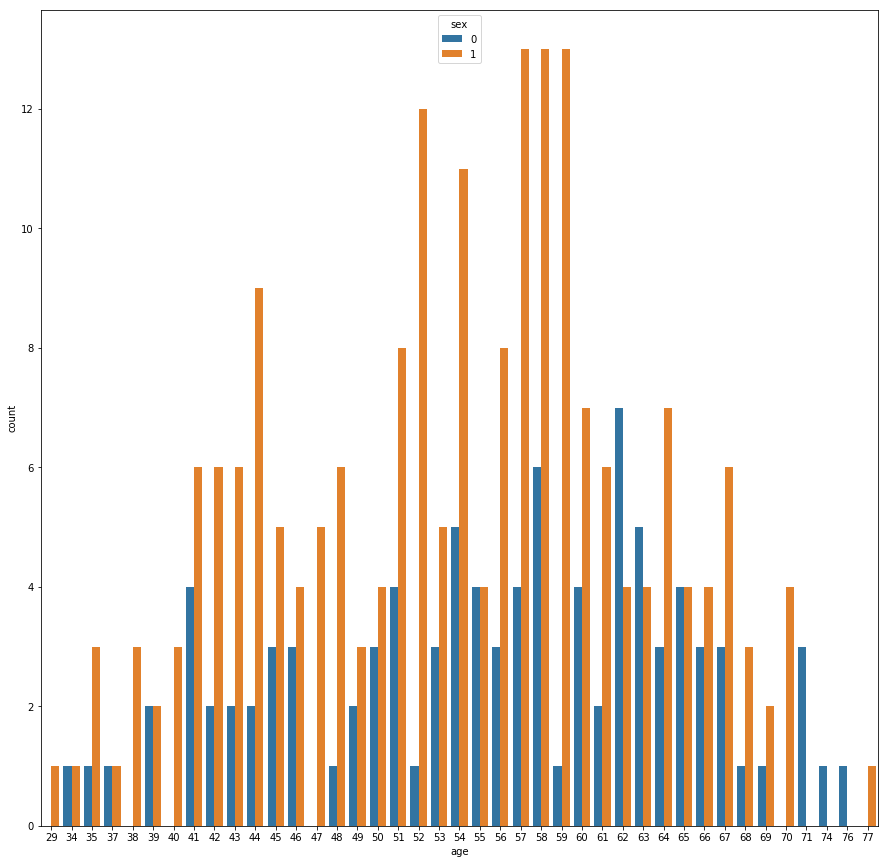

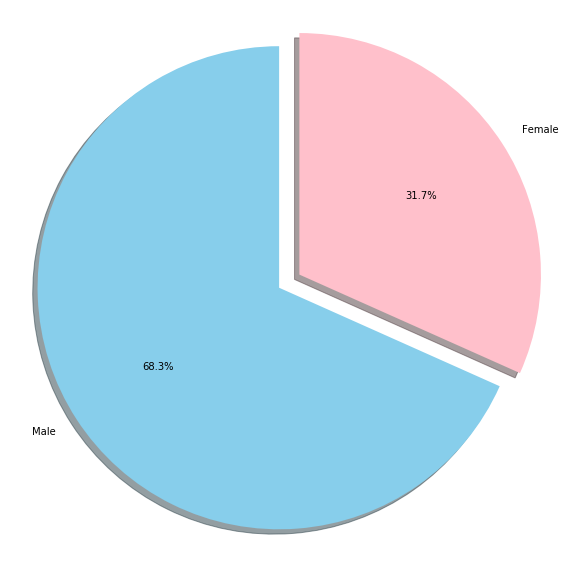

In [11]:
plt.figure(figsize=(15,15))    #We are giving the size of figure
sns.countplot(x=df.age,hue=df.sex)  #countplot taking counts of the columns which you choose 
plt.show()                          #and hue making another bar by the sex columns


df_male = len(df[df['sex']==1])    #we find the number of males
df_female = len(df[df['sex']==0])  #there is the female numbers

#this part for pie figure
plt.figure(figsize=(10,10))    #first size

labels = 'Male','Female'       #than name of labels
sizes = [df_male,df_female]    #giving values
colors = ['skyblue', 'pink']   #choosing color
explode = (0, 0.1)             #In there we are choosing the pie figure one part far from middle 
                               #you will understand when you look at the :)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,  
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

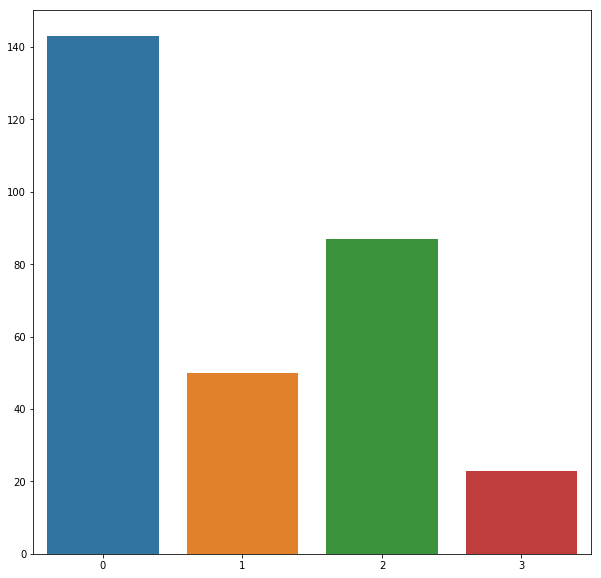

In [12]:
chest_pain_ha = []          

for cp in df['cp'].unique():
    chest_pain_ha.append(len(df[df['cp']==cp]))       #we are finding the counts for the diffenrent chest pain numbers
    
    
plt.figure(figsize=(10,10))
sns.barplot(x=df['cp'].unique(),y= chest_pain_ha)
plt.show()

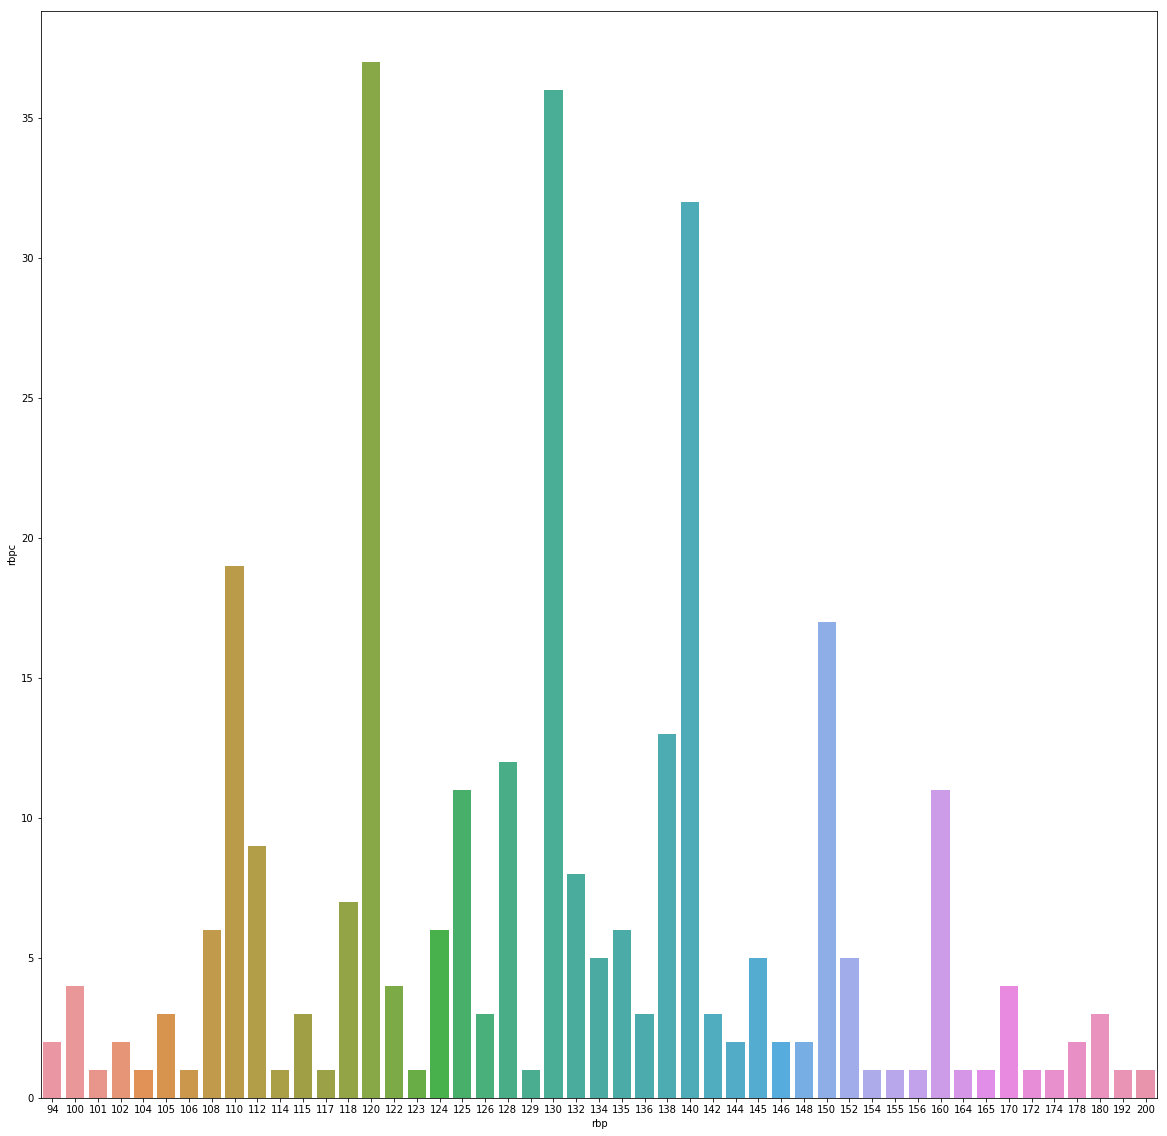

In [24]:
rbpc = []                          #resting blood pressure count

for bp in df['trestbps'].unique():
    rbpc.append(len(df[df['trestbps']==bp]))
    
rbpc = pd.DataFrame(rbpc,columns=['rbpc'])                   #making a columns
rbp  = pd.DataFrame(df['trestbps'].unique(),columns=['rbp'])

resting_blood_count = pd.concat([rbpc,rbp],axis=1)          #combine the columns
resting_blood_count = resting_blood_count.sort_values(by='rbpc',ascending=False)  
                                               #sorting the data by 'rbpc' but its not working I don't know why
    
plt.figure(figsize=(20,20))
sns.barplot(x=resting_blood_count.rbp,y=resting_blood_count.rbpc)
plt.show()

<Figure size 1440x1440 with 0 Axes>

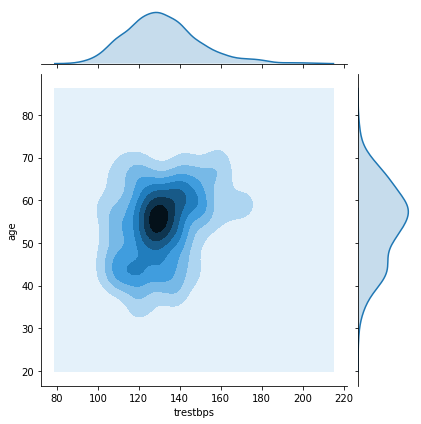

In [25]:
plt.figure(figsize=(20,20))            
sns.jointplot(y=df.age,x=df['trestbps'],kind='kde')  #We are finding resting blood presure by the age
plt.show()


<Figure size 1440x1440 with 0 Axes>

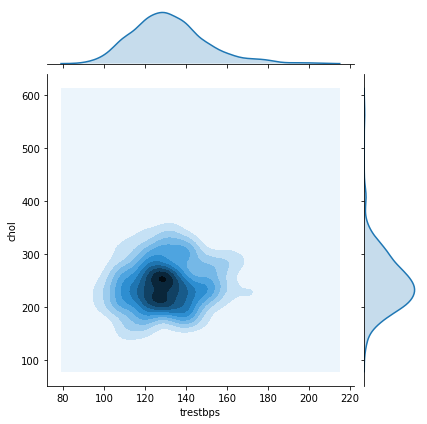

<Figure size 1440x1440 with 0 Axes>

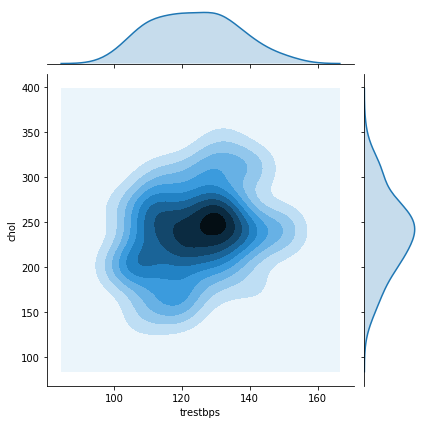

<Figure size 1440x1440 with 0 Axes>

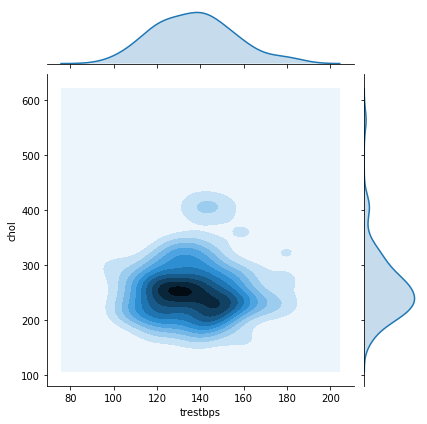

In [26]:
df_40_50 = df[(df['age']>40)&(df['age']<50)]     #We finding people who is age between 40 and 50
df_60_70 = df[(df['age']>60)&(df['age']<70)]     #We finding people who is age between 60 and 70

plt.figure(figsize=(20,20))
sns.jointplot(y=df.chol,x=df['trestbps'],kind='kde') #first we drawing a figure for every person by the cholesterol
plt.show()                                           #and resting blood pressure

plt.figure(figsize=(20,20))
sns.jointplot(y=df_40_50.chol,x=df_40_50['trestbps'],kind='kde')#We do it the same things for 40 and 50 years old people
plt.show()

plt.figure(figsize=(20,20))
sns.jointplot(y=df_60_70.chol,x=df_60_70['trestbps'],kind='kde')#We do it the same things for 60 and 70 years old people
plt.show()

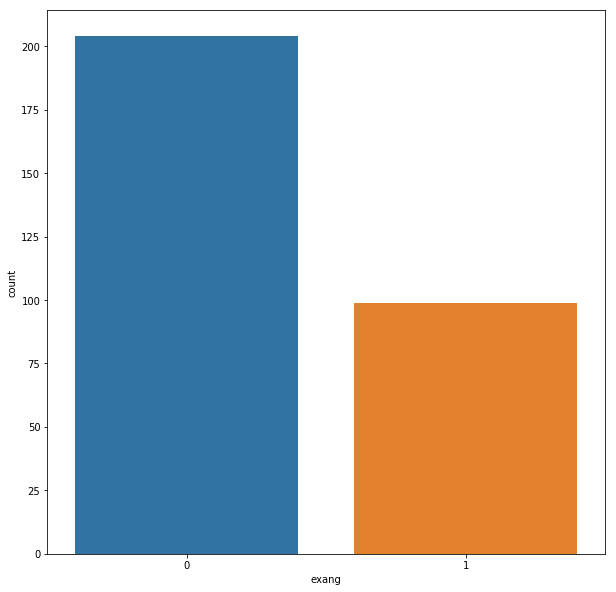

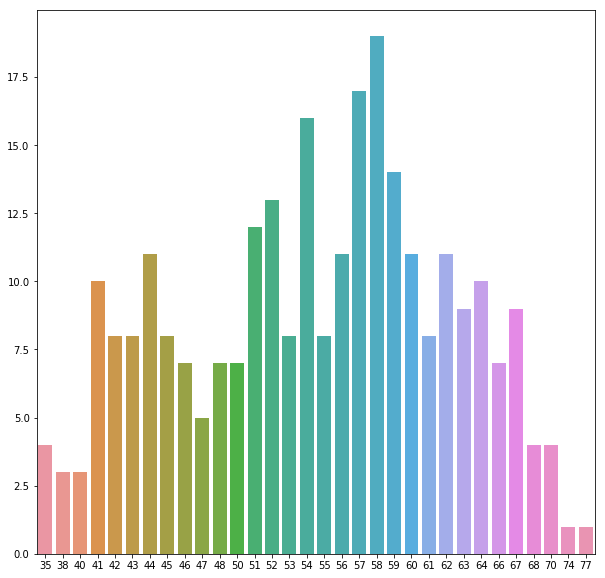

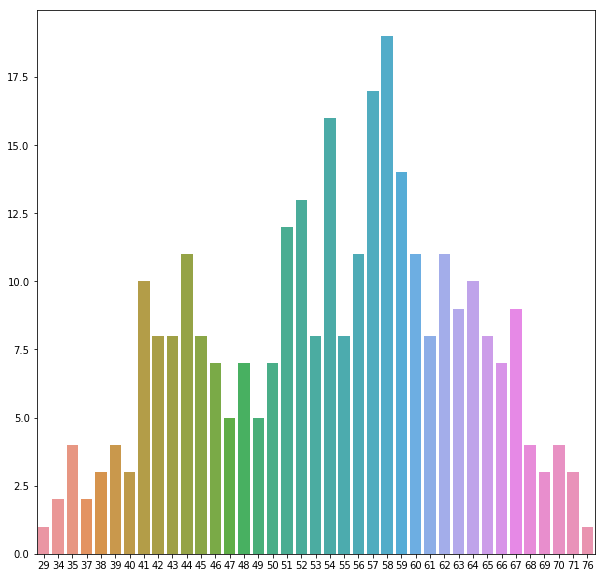

In [32]:
df_angina = df[df['exang']==1]  #who is feeling angina pain after physical exercise
df_anginaa= df[df['exang']==0]  #who is not feeling angina pain after physical exercise

df_angina_age = []
df_anginaa_age = []

plt.figure(figsize=(10,10))  #We find how many person feel angina pain how many of them didn't feel 
sns.countplot(df.exang)
plt.show()

for age in df_angina['age'].unique():
    df_angina_age.append(len(df[df['age']==age]))#We are finding count of who is feeling angina pain for every the age

for age in df_anginaa['age'].unique():
    df_anginaa_age.append(len(df[df['age']==age]))#We are finding count of who is not feeling angina pain for every the age

plt.figure(figsize=(10,10))
sns.barplot(x=df_angina.age.unique(),y=df_angina_age)
plt.show()

plt.figure(figsize=(10,10))
sns.barplot(x=df_anginaa.age.unique(),y=df_anginaa_age)
plt.show()